In [3]:
import numpy as np

# 加载数据
black_data = np.load('target_plot1/black_region.npy')  # 黑色区域
red_data = np.load('target_plot1/red_region.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('target_plot1/features.npy', features)  # 保存打乱的特征数组
np.save('target_plot1/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[-0.38623203 -0.18423538]
 [-0.03350289 -0.41388398]
 [ 0.00175161 -0.40372379]
 [-0.83858299 -0.06337427]
 [ 0.30070891  0.34867617]]
前5个标签： [0 0 1 0 0]


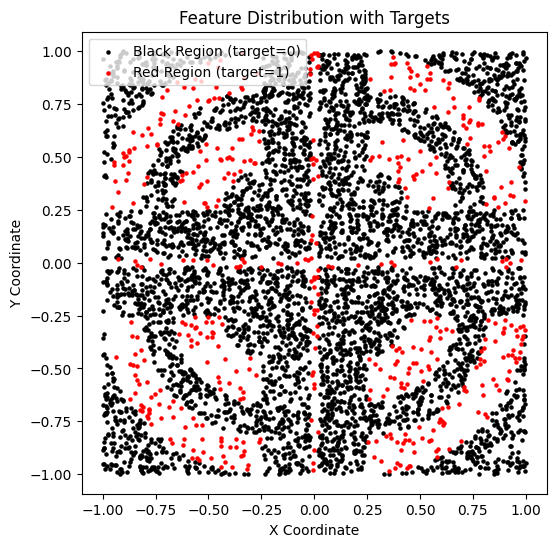

In [2]:

from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('target_plot1/features.npy')
y = np.load('target_plot1/targets.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=5, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=5, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()


Begin to train.... - 2024-12-14 12:44:12,445 - DualGranularBalancedDeepForest
the shape of training samples: (5500, 2) - 2024-12-14 12:44:12,446 - DualGranularBalancedDeepForest
use f1_macro as training evaluation - 2024-12-14 12:44:12,446 - DualGranularBalancedDeepForest
stacking: True, save model: False - 2024-12-14 12:44:12,446 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 12:44:12,447 - DualGranularBalancedDeepForest
The shape of x_train is (5500, 2) - 2024-12-14 12:44:12,447 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9309, f1_score=0.8385, auc=0.9826, gmean=0.9439, sen=0.9600, spe=0.9280, aupr=0.8214 - 2024-12-14 12:44:16,462 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9427, f1_score=0.8621, auc=0.9876, gmean=0.9593, sen=0.9800, spe=0.9390, aupr=0.8854 - 2024-12-14 12:44:16,467 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9273, f1_score=0.8232, auc=0.9679, gmean=0.9056, sen=0.8800, spe=0.9320, aupr=0.7950 - 2024-12-14 12:44:16,472 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9218, f1_score=0.8185, auc=0.9779, gmean=0.9210, sen=0.9200, spe=0.9220, aupr=0.8101 - 2024-12-14 12:44:16,477 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9355, f1_score=0.8381, auc=0.9701, gmean=0.9100, sen=0.8800, spe=0.9410, aupr=0.7971 - 2024-12-14 12:44:16,482 - KFoldWrapper
layer_0, estimator_0

num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9409, f1_score=0.8325, auc=0.9561, gmean=0.8485, sen=0.7500, spe=0.9600, aupr=0.7657 - 2024-12-14 12:44:32,477 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9327, f1_score=0.8018, auc=0.9636, gmean=0.7960, sen=0.6600, spe=0.9600, aupr=0.7223 - 2024-12-14 12:44:32,482 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9400, f1_score=0.8385, auc=0.9685, gmean=0.8786, sen=0.8100, spe=0.9530, aupr=0.7670 - 2024-12-14 12:44:32,486 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9445, f1_score=0.8453, auc=0.9501, gmean=0.8709, sen=0.7900, spe=0.9600, aupr=0.6945 - 2024-12-14 12:44:32,491 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9473, f1_score=0.8499, auc=0.9674, gmean=0.8671, sen=0.7800, spe=0.9640, aupr=0.7668 - 2024-12-14 12:44:32,495 - KFoldWrapper
layer_1, estimator_0

num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9455, f1_score=0.8587, auc=0.9812, gmean=0.9200, sen=0.8900, spe=0.9510, aupr=0.8185 - 2024-12-14 12:44:48,675 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9482, f1_score=0.8589, auc=0.9709, gmean=0.8975, sen=0.8400, spe=0.9590, aupr=0.7910 - 2024-12-14 12:44:48,680 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9545, f1_score=0.8737, auc=0.9714, gmean=0.9057, sen=0.8500, spe=0.9650, aupr=0.8411 - 2024-12-14 12:44:48,684 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9391, f1_score=0.8287, auc=0.9574, gmean=0.8476, sen=0.7500, spe=0.9580, aupr=0.7779 - 2024-12-14 12:44:48,692 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9591, f1_score=0.8895, auc=0.9770, gmean=0.9366, sen=0.9100, spe=0.9640, aupr=0.8455 - 2024-12-14 12:44:48,698 - KFoldWrapper
layer_2, estimator_0

num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9600, f1_score=0.8861, auc=0.9726, gmean=0.9085, sen=0.8500, spe=0.9710, aupr=0.8757 - 2024-12-14 12:45:05,020 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9655, f1_score=0.9033, auc=0.9785, gmean=0.9353, sen=0.9000, spe=0.9720, aupr=0.8585 - 2024-12-14 12:45:05,025 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9600, f1_score=0.8842, auc=0.9770, gmean=0.8987, sen=0.8300, spe=0.9730, aupr=0.8539 - 2024-12-14 12:45:05,032 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9627, f1_score=0.8925, auc=0.9732, gmean=0.9099, sen=0.8500, spe=0.9740, aupr=0.8760 - 2024-12-14 12:45:05,036 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9673, f1_score=0.9036, auc=0.9875, gmean=0.9122, sen=0.8500, spe=0.9790, aupr=0.8411 - 2024-12-14 12:45:05,040 - KFoldWrapper
layer_3, estimator_0

num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9645, f1_score=0.8969, auc=0.9862, gmean=0.9108, sen=0.8500, spe=0.9760, aupr=0.9036 - 2024-12-14 12:45:21,952 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9655, f1_score=0.8936, auc=0.9778, gmean=0.8812, sen=0.7900, spe=0.9830, aupr=0.8904 - 2024-12-14 12:45:21,957 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9636, f1_score=0.8910, auc=0.9794, gmean=0.8905, sen=0.8100, spe=0.9790, aupr=0.8734 - 2024-12-14 12:45:21,962 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9555, f1_score=0.8634, auc=0.9763, gmean=0.8503, sen=0.7400, spe=0.9770, aupr=0.8433 - 2024-12-14 12:45:21,968 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9718, f1_score=0.9181, auc=0.9914, gmean=0.9339, sen=0.8900, spe=0.9800, aupr=0.9079 - 2024-12-14 12:45:21,973 - KFoldWrapper
layer_4, estimator_0

num_layers_before_append: 4
num_layers: 5
last_layer_index 4
UncertaintyAwareDeepForest - Accuracy: 0.9813


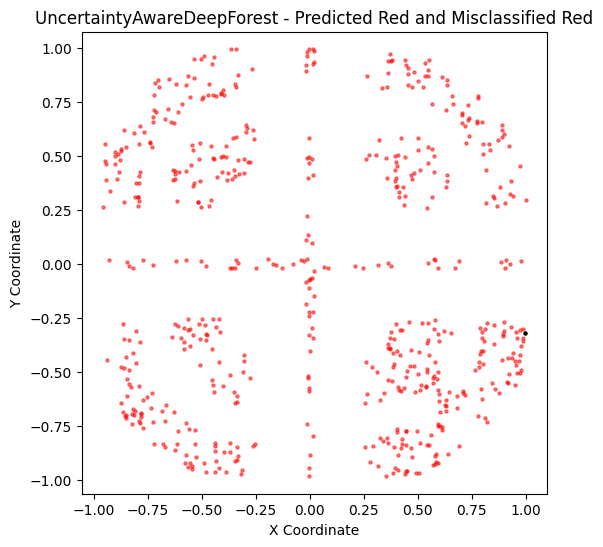

In [7]:
import os
# 配置输出文件夹
output_dir = "target_plot1"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training BalanceCascade...
BalanceCascade - Accuracy: 0.9976
Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 1.0000
Training UnderBagging...
UnderBagging - Accuracy: 0.9620
Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.6973
Training RUSBoost...
RUSBoost - Accuracy: 0.6596
Training BalancedRandomForest...
BalancedRandomForest - Accuracy: 0.9105
Training AdaCost...
AdaCost - Accuracy: 0.5129
Training AdaUBoost...
AdaUBoost - Accuracy: 0.7158
Training AsymBoost...
AsymBoost - Accuracy: 0.9047


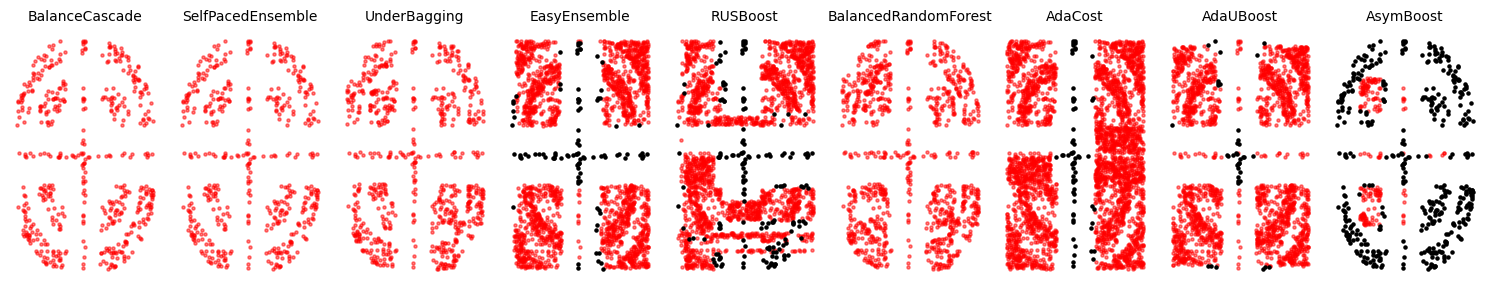

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os

# 配置输出文件夹
output_dir = "target_plot1"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50)
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 1.0000
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.7196
Training OverBoost...
OverBoost - Accuracy: 0.7004
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7618
Training SMOTEBagging...
SMOTEBagging - Accuracy: 0.9998


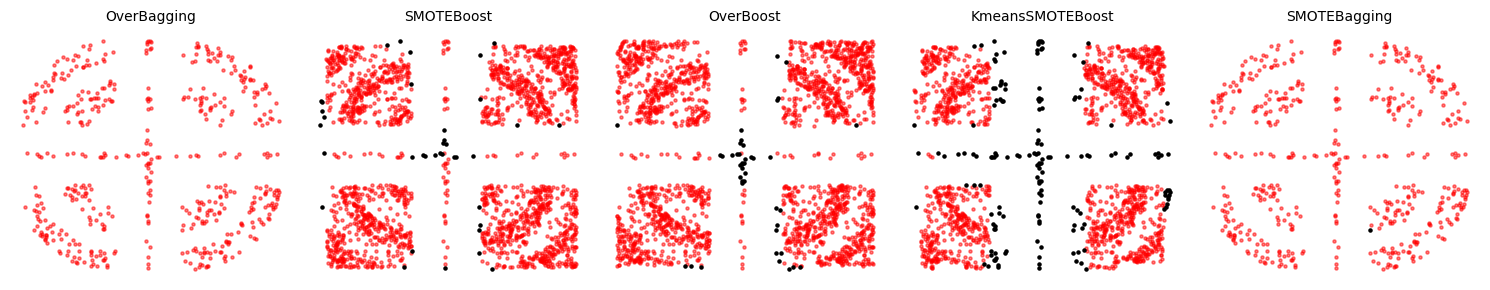

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "target_plot1"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    
    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
